# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
# Create a DataFrame for Cities Weather
cities_weather = {"City": cities}
cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df["Cloudiness"] = ""
cities_weather_df["Country"] = ""
cities_weather_df["Date"] = ""
cities_weather_df["Humidity"] = ""
cities_weather_df["Lat"] = ""
cities_weather_df["Lng"] = ""
cities_weather_df["Max Temp"] = ""
cities_weather_df["Wind Speed"] = ""
cities_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,,,,,,,,
1,kochi,,,,,,,,
2,codrington,,,,,,,,
3,dwarka,,,,,,,,
4,port moresby,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("Beginning Data Retrieval")
print("------------------------")

record_num = 1
num_of_set = 1

for index, row in cities_weather_df.iterrows():
    
    city = row["City"]
        
    target_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    response = requests.get(target_url)
    data = response.json()
    
    try:
        cities_weather_df.loc[index, "Cloudiness"] = data["clouds"]["all"]
        cities_weather_df.loc[index, "Country"] = data["sys"]["country"]
        cities_weather_df.loc[index, "Date"] = data["dt"]
        cities_weather_df.loc[index, "Humidity"] = data["main"]["humidity"]
        cities_weather_df.loc[index, "Lat"] = data["coord"]["lat"]
        cities_weather_df.loc[index, "Lng"] = data["coord"]["lon"]
        cities_weather_df.loc[index, "Max Temp"] = data["main"]["temp_max"]
        cities_weather_df.loc[index, "Wind Speed"] = data["wind"]["speed"]
            
        print(f"Processing Record {record_num} of Set {num_of_set}| {city}")
        record_num += 1
        
    except:
        print("City not found. Skipping...")
        
    if record_num % 51 == 0 and record_num >= 51:
            num_of_set += 1
            record_num = 1
            time.sleep(60)

print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1| rikitea
Processing Record 2 of Set 1| kochi
Processing Record 3 of Set 1| codrington
Processing Record 4 of Set 1| dwarka
Processing Record 5 of Set 1| port moresby
Processing Record 6 of Set 1| hannan
Processing Record 7 of Set 1| yulara
Processing Record 8 of Set 1| port alfred
Processing Record 9 of Set 1| richards bay
Processing Record 10 of Set 1| longyearbyen
Processing Record 11 of Set 1| sur
Processing Record 12 of Set 1| walvis bay
Processing Record 13 of Set 1| shu
Processing Record 14 of Set 1| hobart
Processing Record 15 of Set 1| daryapur
Processing Record 16 of Set 1| kruisfontein
Processing Record 17 of Set 1| hermanus
Processing Record 18 of Set 1| petropavlovsk-kamchatskiy
Processing Record 19 of Set 1| labuhan
Processing Record 20 of Set 1| buraydah
Processing Record 21 of Set 1| qaanaaq
Processing Record 22 of Set 1| hilo
Processing Record 23 of Set 1| grand gaube
Processing Record 24 of 

Processing Record 46 of Set 4| saint-georges
Processing Record 47 of Set 4| gunnedah
Processing Record 48 of Set 4| bartlesville
Processing Record 49 of Set 4| kayes
Processing Record 50 of Set 4| vilnius
Processing Record 1 of Set 5| manuk mangkaw
Processing Record 2 of Set 5| sonoita
Processing Record 3 of Set 5| bambous virieux
Processing Record 4 of Set 5| puerto madero
Processing Record 5 of Set 5| tuatapere
Processing Record 6 of Set 5| kailua
Processing Record 7 of Set 5| simplicio mendes
Processing Record 8 of Set 5| new norfolk
Processing Record 9 of Set 5| katima mulilo
Processing Record 10 of Set 5| kautokeino
Processing Record 11 of Set 5| bafra
Processing Record 12 of Set 5| rawah
Processing Record 13 of Set 5| leningradskiy
Processing Record 14 of Set 5| aldan
Processing Record 15 of Set 5| celestun
Processing Record 16 of Set 5| ribeira grande
Processing Record 17 of Set 5| haimen
Processing Record 18 of Set 5| anahuac
City not found. Skipping...
Processing Record 19 of 

Processing Record 38 of Set 8| ixtapa
Processing Record 39 of Set 8| becerril
Processing Record 40 of Set 8| beidao
Processing Record 41 of Set 8| kem
Processing Record 42 of Set 8| vila franca do campo
Processing Record 43 of Set 8| alenquer
City not found. Skipping...
Processing Record 44 of Set 8| broome
City not found. Skipping...
Processing Record 45 of Set 8| san cristobal
Processing Record 46 of Set 8| mogapi
City not found. Skipping...
Processing Record 47 of Set 8| diamantina
Processing Record 48 of Set 8| kollam
Processing Record 49 of Set 8| dunda
Processing Record 50 of Set 8| rey bouba
City not found. Skipping...
Processing Record 1 of Set 9| dolinsk
Processing Record 2 of Set 9| pyapon
Processing Record 3 of Set 9| nipawin
Processing Record 4 of Set 9| varzea alegre
Processing Record 5 of Set 9| smithers
Processing Record 6 of Set 9| kijang
Processing Record 7 of Set 9| poddorye
Processing Record 8 of Set 9| forio
Processing Record 9 of Set 9| corleone
Processing Record 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Check Cities Data Frame
cities_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,22,PF,1620878670,78,-23.1203,-134.969,77.4,17.67
1,kochi,100,IN,1620878672,76,9.9399,76.2602,82.31,3.71
2,codrington,100,AU,1620878673,71,-38.2667,141.967,52.68,18.19
3,dwarka,17,IN,1620878076,70,22.2394,68.9678,85.3,18.37
4,port moresby,100,PG,1620878674,74,-9.4431,147.18,82.98,4.83
...,...,...,...,...,...,...,...,...,...
616,terrak,100,NO,1620879492,97,65.087,12.3715,44.47,2.46
617,kurmanayevka,34,RU,1620879492,48,52.5093,52.0675,67.41,12.82
618,luang prabang,9,LA,1620879493,50,19.8856,102.135,93.58,2.62
619,ishigaki,40,JP,1620879493,79,24.3448,124.157,85.78,16.11


In [6]:
# Dropping rows with empty values
cities_df = cities_weather_df
nan_value = float("NaN")
cities_df.replace("", nan_value, inplace=True)
cities_df.dropna(inplace=True)
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,22.0,PF,1.620879e+09,78.0,-23.1203,-134.9692,77.40,17.67
1,kochi,100.0,IN,1.620879e+09,76.0,9.9399,76.2602,82.31,3.71
2,codrington,100.0,AU,1.620879e+09,71.0,-38.2667,141.9667,52.68,18.19
3,dwarka,17.0,IN,1.620878e+09,70.0,22.2394,68.9678,85.30,18.37
4,port moresby,100.0,PG,1.620879e+09,74.0,-9.4431,147.1797,82.98,4.83
...,...,...,...,...,...,...,...,...,...
616,terrak,100.0,NO,1.620879e+09,97.0,65.0870,12.3715,44.47,2.46
617,kurmanayevka,34.0,RU,1.620879e+09,48.0,52.5093,52.0675,67.41,12.82
618,luang prabang,9.0,LA,1.620879e+09,50.0,19.8856,102.1347,93.58,2.62
619,ishigaki,40.0,JP,1.620879e+09,79.0,24.3448,124.1572,85.78,16.11


In [7]:
cities_df.to_csv(r"cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
def humidity_over_100(s):
    over_100 = s.to_numpy()
    return (over_100[0] > 100).all()
humidity_over_100(cities_df["Humidity"])

False

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

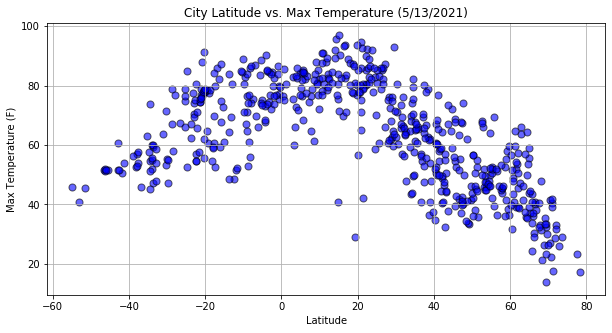

<Figure size 432x288 with 0 Axes>

In [10]:
latitude_values = cities_df["Lat"]
temp_values = cities_df["Max Temp"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, temp_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Max Temperature (5/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Humidity Plot

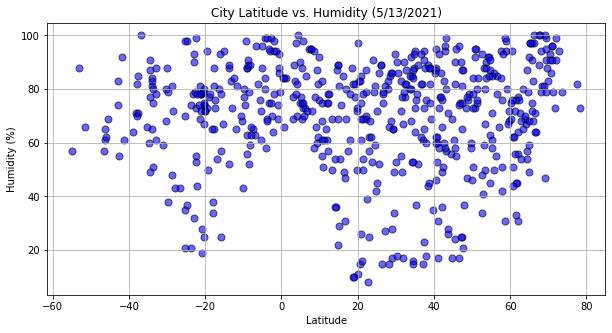

<Figure size 432x288 with 0 Axes>

In [11]:
humidity_values = cities_df["Humidity"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, humidity_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Humidity (5/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Cloudiness Plot

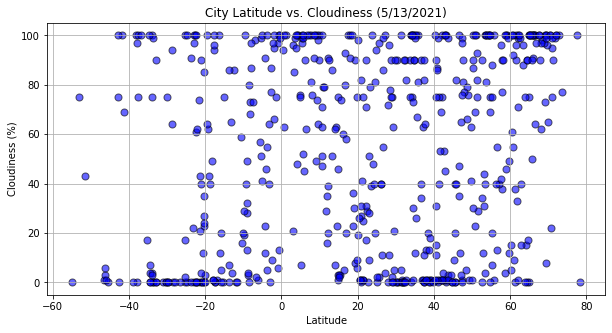

<Figure size 432x288 with 0 Axes>

In [12]:
cloud_values = cities_df["Cloudiness"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, cloud_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Cloudiness (5/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Wind Speed Plot

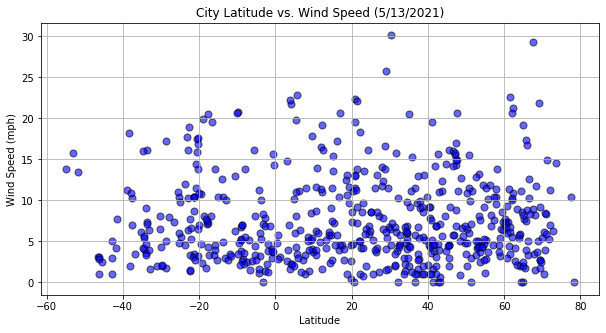

<Figure size 432x288 with 0 Axes>

In [13]:
wind_values = cities_df["Wind Speed"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, wind_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Wind Speed (5/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
plt.tight_layout()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8157805233113454


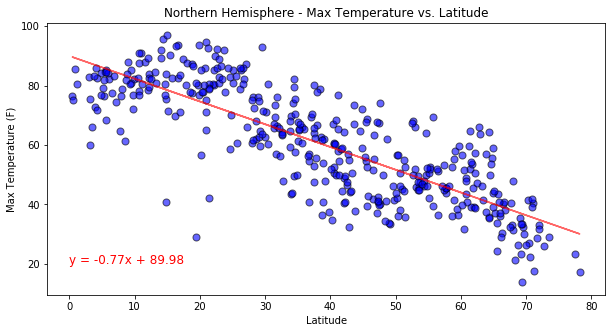

In [14]:
# Northern Hemisphere: Latitude > 0 Degrees
northern_hemisphere = cities_df["Lat"] > 0
northern_hemisphere_table = cities_df[northern_hemisphere]

x_values = northern_hemisphere_table["Lat"]
y_values = northern_hemisphere_table["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

---
#### In the plot above, we see that in the Northern hemisphere there is a strong negative correlation between Temperature and Latitude (-0.82). The higher the latitude, the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6618274776114736


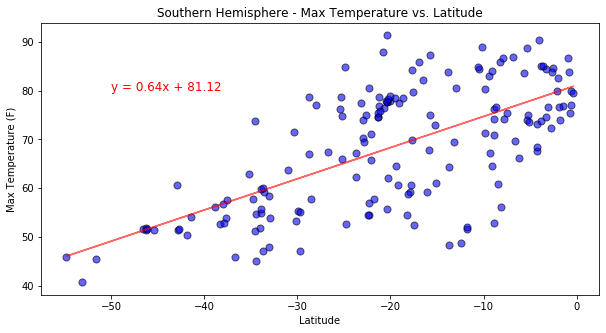

In [15]:
# Southern Hemisphere: Latitude < 0 Degrees
southern_hemisphere = cities_df["Lat"] < 0
southern_hemisphere_table = cities_df[southern_hemisphere]
x_values = southern_hemisphere_table["Lat"]
y_values = southern_hemisphere_table["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,80),fontsize=12,color="red")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

---
#### In the southern hemisphere, we see there's a fairly strong correlation between the temperature and the latitude (0.66). The lower the latitude, the lower the temperature

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10980443989814573


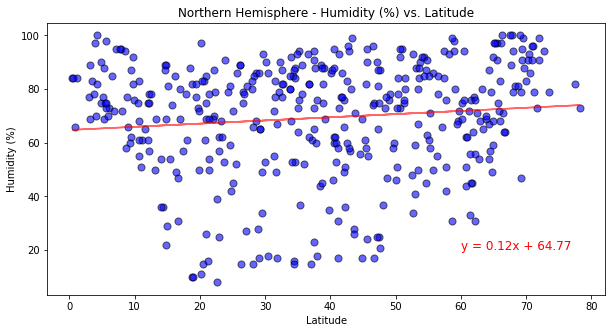

In [16]:
x_values = northern_hemisphere_table["Lat"]
y_values = northern_hemisphere_table["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(60,20),fontsize=12,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

---
#### The correlation between humidity % and latitude in the Northern hemisphere is extremely weak (0.1). The line is almost parallel to the latitude (x-axis)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1912429551102648


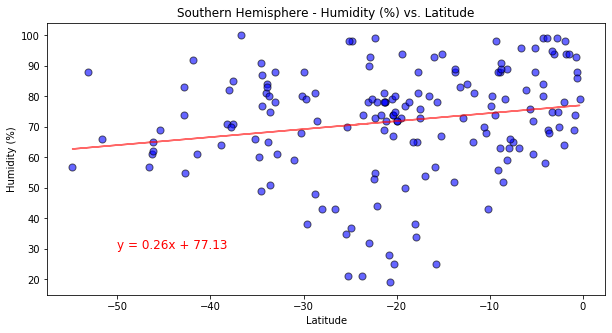

In [17]:
x_values = southern_hemisphere_table["Lat"]
y_values = southern_hemisphere_table["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

---
#### The correlation between humidity % and latitude in the Southern hemisphere is also weak (0.2). The line is almost parallel to the latitude (x-axis)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08605925737932629


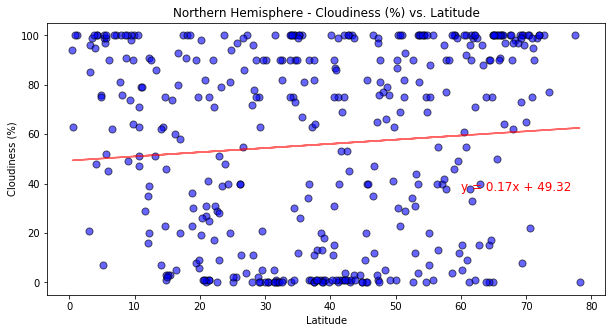

In [18]:
x_values = northern_hemisphere_table["Lat"]
y_values = northern_hemisphere_table["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(60,37),fontsize=12,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

---
#### The correlation between cloudiness % and latitude in the Northern hemisphere is very weak (0.09).

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1593222922786037


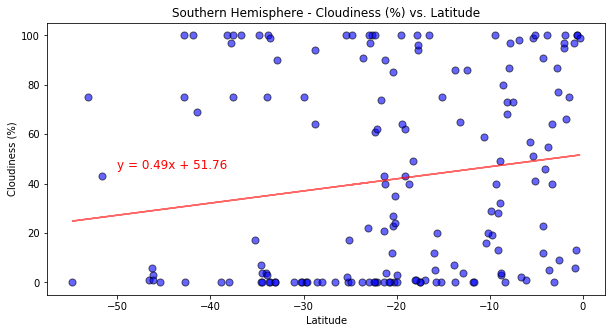

In [19]:
x_values = southern_hemisphere_table["Lat"]
y_values = southern_hemisphere_table["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,46),fontsize=12,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

---
#### The correlation between cloudiness % and latitude in the Southern hemisphere is also very weak (0.16). There isn't much correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.02015528079655087


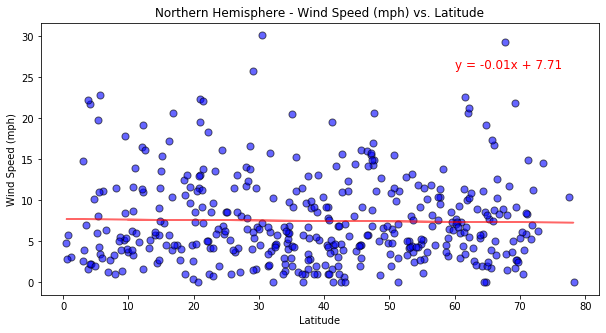

In [23]:
x_values = northern_hemisphere_table["Lat"]
y_values = northern_hemisphere_table["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(60,26),fontsize=12,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

---
#### The correlation between windspeed and latitude in the Northern hemisphere is negative and very weak, it's almost negligible (-0.02). The line is almost parallel to the latitude (x-axis).

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0719544456784162


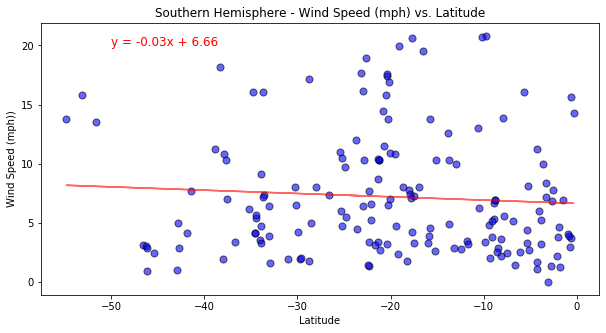

In [22]:
x_values = southern_hemisphere_table["Lat"]
y_values = southern_hemisphere_table["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")
print(f"The r-value is: {rvalue}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.show()

---
#### The same with the Southern hemisphere. Negative and weak correlation between windspeed and latitude.